# Linear State Space Models

## What Does Linear State Mean?

 ### Example 1: Deterministic Solow Growth Model with Partial Depreciation

Production function: 

$$y_t= k_t^\alpha$$

Saving rate:

$$s$$

Consumption: 

$$c_t=(1-s)y_t=(1-s)k_t^\alpha$$

Capital for next period: 

$$k_{t+1}=(1-\delta)k_t+s y_t$$

Law of motion: 

\begin{align}
k_{t+1}&=(1-\delta)k_t+s  k_t^\alpha
\end{align}

  ### What are the state variables in this model?

  ### Is this a linear state space model?


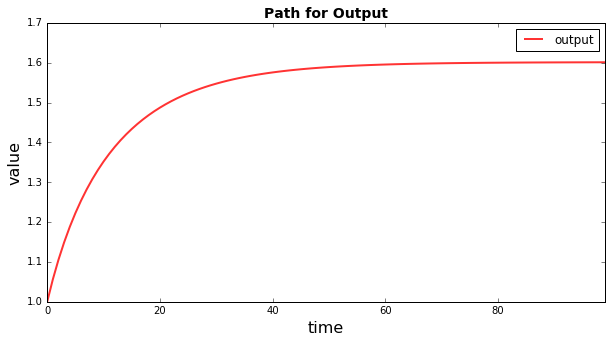

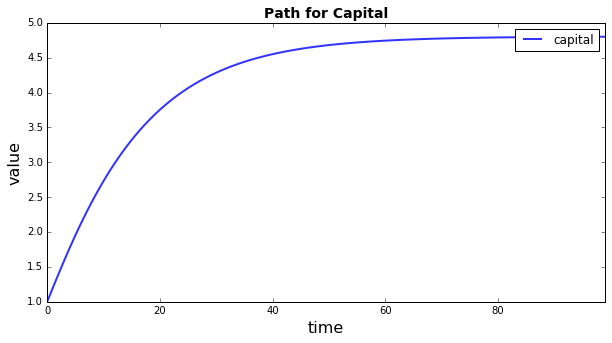

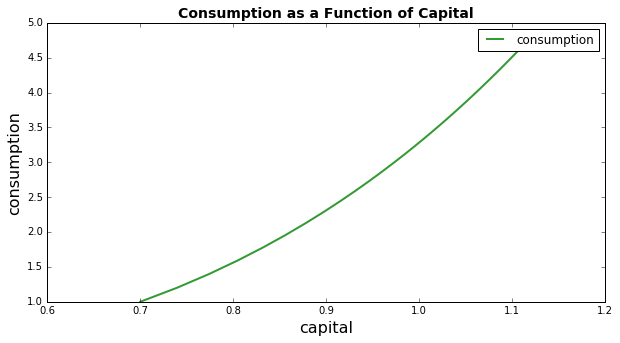

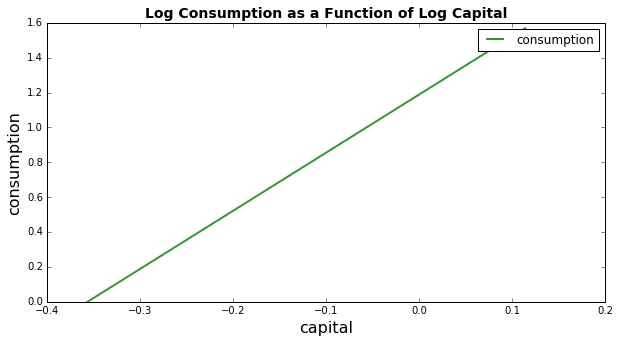

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

  
# Solow Growth Model 
# k'=(1-delta)k+i 
# i+c=y=k**alpha
# c=(1-s)y

# == parameters == #
# s: saving rate, between 0 and 1
# alpha: return to capital in the production function
# delta: depreciation rate
# k_0: initial capital stock

s = 0.3
alpha = 0.3
delta = 0.1
k_0 = 1

# N: number of periods for the transition

N = 100
 
# == set up the simulation and initialize the arrays == #
  
Simul_y = np.zeros(N)
Simul_c = np.zeros(N)
Simul_i = np.zeros(N)
Simul_k = np.zeros(N+1)
Simul_k[0] = k_0

# == Simulation == #

for i in range(N):
    Simul_y[i] = Simul_k[i]**alpha
    Simul_c[i] = (1-s)*Simul_y[i]
    Simul_i[i] = s*Simul_y[i]
    Simul_k[i+1] = (1-delta)*Simul_k[i]+Simul_i[i]
    

# == Plots == #
    
# = path for output = #  
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)   
ax.plot(Simul_y, 'r-', lw=2, alpha=0.8, label=r'output')   
ax.legend(ncol=1)
plt.title(r"Path for Output", fontsize=14, fontweight='bold')
  
# = path for capital = #  
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)  
ax.plot(Simul_k, 'b-', lw=2, alpha=0.8, label=r'capital')     
ax.legend(ncol=1)
plt.title(r"Path for Capital", fontsize=14, fontweight='bold')
plt.show()   
     
# = consumption as a function of capital = #  
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel(r'capital', fontsize=16)
ax.set_ylabel(r'consumption', fontsize=16)  
ax.plot(Simul_c[0:N], Simul_k[0:N], 'g-', lw=2, alpha=0.8, label=r'consumption')     
ax.legend(ncol=1)
plt.title(r"Consumption as a Function of Capital", fontsize=14, fontweight='bold')
plt.show() 

# = consumption as a function of capital = #  
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel(r'capital', fontsize=16)
ax.set_ylabel(r'consumption', fontsize=16)  
ax.plot(np.log(Simul_c[0:N]), np.log(Simul_k[0:N]), 'g-', lw=2, alpha=0.8, label=r'consumption')     
ax.legend(ncol=1)
plt.title(r"Log Consumption as a Function of Log Capital", fontsize=14, fontweight='bold')
plt.show() 



### Example 2: Stochastic Solow Growth Model with Full Depreciation

Production function: 

$$y_t= \exp(z_t) k_t^\alpha$$

Technology: 
    
$$z_t\sim \mathcal N(0,\sigma^2)$$    

Saving rate:

$$s$$

Consumption: 

$$c_t=(1-s)y_t=(1-s)\exp(z_t) k_t^\alpha$$

Assume full depreciation. Capital for next period: 

$$k_{t+1}=s y_t$$

Law of motion: 

\begin{align}
k_{t+1}&=s \exp(z_t) k_t^\alpha
\end{align}

 

  ### Consider the following change of variable

Let $\widehat x$ denote the natural log of $x$. Then the law of motion of capital can be written as

\begin{align}
\widehat k_{t+1}&=\widehat s +  z_t + \alpha \widehat k_t
\end{align}

The log of consumption is given by

$$\widehat c_t=\widehat {(1-s)}+  z_t +\alpha \widehat k_t$$



  ### What are the state variables in this model?

  ### Is this a linear state space model?

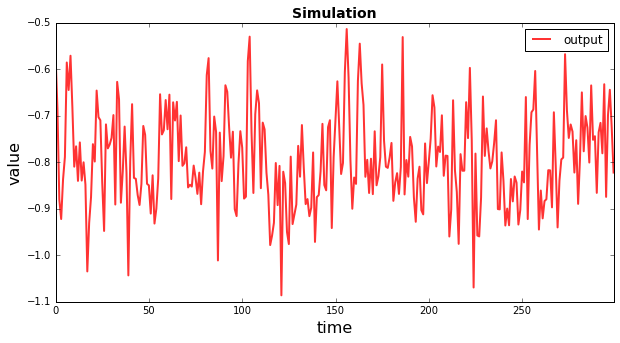

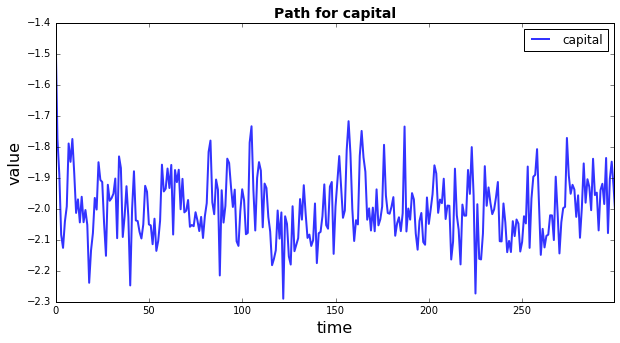

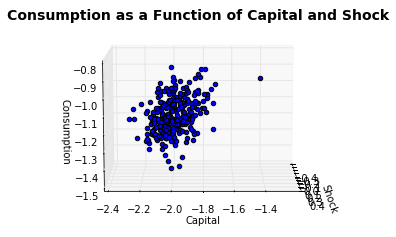

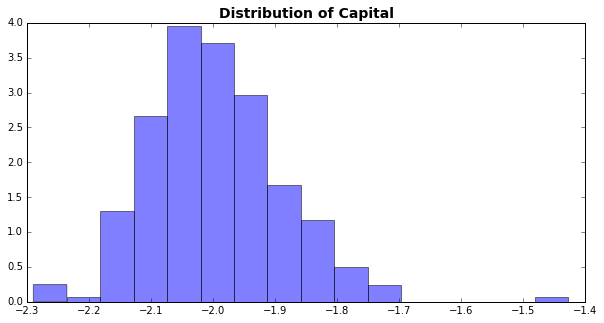

In [2]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import exp 

# Stochastic Solow Growth Model #
# k'=(1-delta)k+i 
# i+c=y=exp(tfp)k**alpha 
# c=(1-s)y 

# == parameters == #

# s: saving rate, between 0 and 1
# alpha: return to capital in the production function
# delta: depreciation rate
# k_0: initial capital stock

s = 0.3
alpha = 0.4
delta = 1.0
k_0 = 0.24

# N: number of periods for the transition
# std: st.d of innovation
# rho: persistence of tfp
 
N = 300 
std = 0.1 
rho = 0.0
 
# == set up the simulation == #

Simul_shock = np.random.normal(0, std, N)
Simul_y = np.zeros(N)
Simul_c = np.zeros(N)
Simul_i = np.zeros(N)
Simul_k = np.zeros(N+1)
Simul_k[0] = k_0
Simul_tfp = np.zeros(N+1)

for i in range(N):    
    Simul_tfp[i+1] = rho*Simul_tfp[i]+Simul_shock[i]
    Simul_y[i] = exp(Simul_tfp[i])*Simul_k[i]**alpha
    Simul_c[i] = (1-s)*Simul_y[i]
    Simul_i[i] = s*Simul_y[i]
    Simul_k[i+1] = (1-delta)*Simul_k[i]+Simul_i[i]
    
# Plot the path for output
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)
ax.plot(np.log(Simul_y), 'r-', lw=2, alpha=0.8, label=r'output')   
ax.legend(ncol=1)
plt.title(r"Simulation", fontsize=14, fontweight='bold')
plt.show()     


# Plot the path for capital
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)
ax.plot(np.log(Simul_k), 'b-', lw=2, alpha=0.8, label=r'capital')     
ax.legend(ncol=1)
plt.title(r"Path for capital", fontsize=14, fontweight='bold')
plt.show()   


# Plot the consumption as a function of capital
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(N):
    ax.scatter(Simul_shock[i], np.log(Simul_k[i]), np.log(Simul_c[i]), 'ro' )
ax.view_init(10, 0)    
ax.set_xlabel('Shock')
ax.set_ylabel('Capital')
ax.set_zlabel('Consumption') 
plt.title(r"Consumption as a Function of Capital and Shock", fontsize=14, fontweight='bold')
plt.show()   


# Plot the distribution of Capital
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(np.log(Simul_k[0:N]), bins=16, normed=True, orientation='vertical', alpha=0.5)   
plt.title(r"Distribution of Capital", fontsize=14, fontweight='bold')
plt.show()   

## Linear State Space Model: What Does It Mean?

 An economic model can be undertood in the following way. Given a state variable $x_t$ (could be a vector), agents choose their action $y_t\in U(x_t)$ (could be a vector).

\begin{equation}
y_t=g(x_t)
\end{equation}

 Given agents' choice $y_t$, the state variable in the next period is given by

\begin{equation}
x_{t+1}=f(x_t,y_t,\epsilon_{t+1})
\end{equation}
where $\epsilon_t$ are exogenous shocks.

In the Solow growth model, the function $g$ and the function $f$ are not linear functions. In the log-linearized Solow growth model, both functions are linear. 

The linear state space model we will study has the properties that the evolution of the state variables and the choice variables
depend linearly on the state variables and shocks. 

## Linear State Space Models: A Classic Representation

Let $x_t$ denote the vector of state variables and $y_t$ denote the vector of observables

$$
\begin{split}\begin{align}
    x_{t+1} & =  A x_t + C w_{t+1}   \\
    y_t &  =  G x_t \nonumber \\
    x_0 & \sim N(\mu_0, \Sigma_0) \nonumber
\end{align}\end{split}
$$

+ Where the primatives of the model are:

    1. The matrices $A,C,G$

    2. The shock distribution which we have specialized to $\mathcal N (0,I)$

    3. The distribution of initial $x_0$, which we have set to $\mathcal N(\mu_0,\Sigma_0)$
    

+ Note given $A,C,G$ draws of $x_0$ and $w_1,w_2,\ldots$ pin down the values of $\{x_t\}$ and $\{y_t\}$

+ Thus this system pins down the probability distribution over the sequences of $\{x_t\}$ and $\{y_t\}$    

## Some Preliminary Stuff on ARMA $(p,q)$ Process

ARMA: autoregressive moving average

### Let's start with an AR(1) process. 

\begin{equation}
y_t=\rho y_{t-1}+ \sigma_w w_t
\end{equation}

Here we assume that $-1<\rho<1$ and $w_t$ is a white noise. 

1
2
3
4


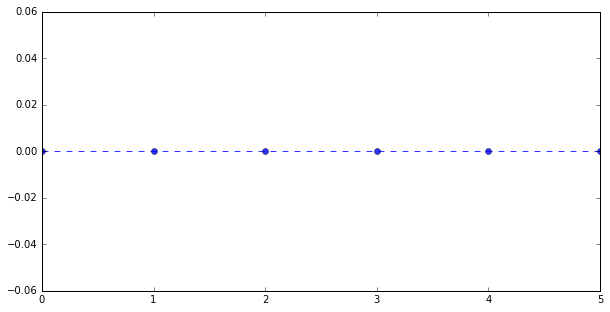

In [3]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 

# AR(1)
# N: number of periods for the transition
# std: st.d of innovation

N = 5
std = 1.0
rho = -0.9
 
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std
# Simul_shock = np.random.normal(0, std, N)  #Generate a Shock for Simulation
Simul_y = np.zeros(N+1)

# = Generate Data = #
for i in range(1,N):
    print(i)
    Simul_y[i] = rho*Simul_y[i-1]+Simul_shock[i]
    
     
# Plot the simulation
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()       

#### Understand AR(1) process via its moving average representation

AR(1) process has a moving-average representation

\begin{align}
y_t&=\rho y_{t-1}+w_t\\
&=\rho^2 y_{t-2}+\rho w_{t-1}+w_t\\
&=\rho^3 y_{t-3}+\rho^2 w_{t-2}+\rho w_{t-1}+w_t\\
&\vdots\\
&=w_t+\rho w_{t-1}+\rho^2 w_{t-2}+\rho^3 w_{t-3}+\ldots
\end{align}

Note that if $-1<\rho<1$, $\rho^\infty=0$. If $w_{s}=0$ for all $s$ except that $w_t=1$, then 

\begin{align}
y_t&=w_t\\
y_{t+1}&=\rho w_{t}\\
y_{t+2}&=\rho^2 w_{t}\\
&\vdots\\
y_{t+n}&= \rho^n w_{t} 
\end{align}

The impulse-response of $y_t$ is given by its moving-average representation. 


### Let's look at a MA(1) process. 

\begin{equation}
y_t=w_t+\theta w_{t-1}
\end{equation}

Here we do not restrict the value of $\theta$.

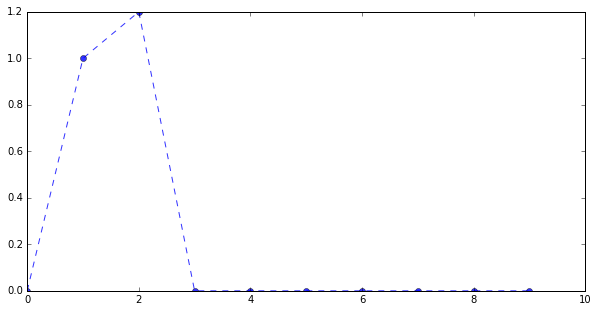

In [4]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Specify Parameters == #
    
# N: number of periods for the transition
# std: st.d of innovation

N = 10
std = 1.0
theta = 1.2
 
# = Set up the simulation = #

Simul_shock = np.zeros(N+1)
Simul_shock[1]=std
# Simul_shock = np.random.normal(0, std, N) # Generate shock for simulation
Simul_y = np.zeros(N)
 
# = Generate Data = #
for i in range(1,N):
    Simul_y[i] = Simul_shock[i]+theta*Simul_shock[i-1]
    
     
# Plot the simulation
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()       

## How to represent a more complicated system using the framework?

### Example: AR(2) process

Let $\{y_t\}$ be a deterministic sequence that satifies

$$
    y_{t+1} =  \phi_1 y_t + \phi_2 y_{t-1}+w_t
    \quad \text{s.t.} \quad
    y_0, y_{-1} \text{ given}
$$

To map  into our state space system, we set

$$
    x_t=
    \begin{bmatrix}       
        y_t \\
        y_{t-1}
    \end{bmatrix}
    \qquad
    A = \begin{bmatrix}        
          \phi_1 & \phi_2  \\
              0 & 1 
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        1 \\
        0 
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix}  1 & 0 \end{bmatrix}
$$

### Example: AR(2) process with constant

Let $\{y_t\}$ be a deterministic sequence that satifies

$$
    y_{t+1} =\phi_0+  \phi_1 y_t + \phi_2 y_{t-1}+w_t
    \quad \text{s.t.} \quad
    y_0, y_{-1} \text{ given}
$$

To map  into our state space system, we set

$$
    x_t=
    \begin{bmatrix}
        1 \\
        y_t \\
        y_{t-1}
    \end{bmatrix}
    \qquad
    A = \begin{bmatrix}
              1 & 0 & 0 \\
              \phi_0 & \phi_1 & \phi_2  \\
              0 & 1 & 0
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        0 \\
        1 \\
        0
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}
$$

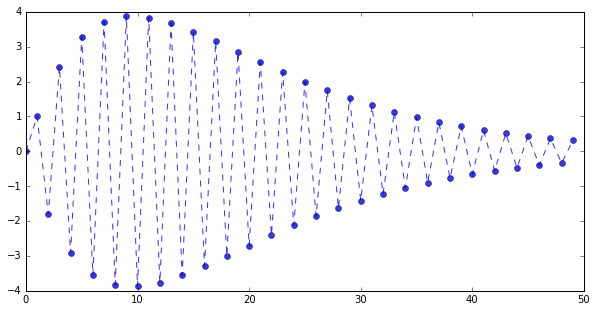

In [5]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Specify Parameters == #
# N: number of periods for the transition
# std: st.d of innovation

N = 50
std = 1.0
phi_0 = 0.0 
phi_1 = -1.8
phi_2 = -0.81

A = np.array(([1,0,0],[phi_0,phi_1,phi_2],[0,1,0]))    
C = np.array(([0,1,0])) 
G = np.array(([0,1,0])) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std
#Simul_shock = np.random.normal(0, std, N) # Generate a random shock for simulation
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([1,0,0])
Simul_y = np.zeros(N)
 
# = Generate Data = #
for i in range(0,N):
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
    Simul_y[i] = np.dot(G, Simul_x[i,:])
     
        
# = Plot the simulation = #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

### Example: AR(2) process with time trend

Let $\{y_t\}$ be a deterministic sequence that satifies

$$
    y_{t+1} =  \phi_0 t + \phi_1 y_t + \phi_2 y_{t-1}+w_t
    \quad \text{s.t.} \quad
    y_0, y_{-1} \text{ given}
$$

To map  into our state space system, we set

$$
    x_t=
    \begin{bmatrix}
        1 \\
        y_t \\
        y_{t-1}
    \end{bmatrix}
    \qquad
    A_t = \begin{bmatrix}
              1 & 0 & 0 \\
              \phi_0t & \phi_1 & \phi_2  \\
              0 & 1 & 0
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        0 \\
        1 \\
        0
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}
$$

### Example: ARMA(1,1) process

Let $\{y_t\}$ be a deterministic sequence that satifies

$$
    y_{t+1} =  \rho y_t + w_t+\theta w_{t-1}
    \quad \text{s.t.} \quad
    y_0, y_{-1} \text{ given}
$$

To map  into our state space system, we set

$$
    x_t=
    \begin{bmatrix}       
        y_t \\
        w_{t}
    \end{bmatrix}
    \qquad
    A = \begin{bmatrix}        
          \rho & \theta  \\
              0 & 0 
        \end{bmatrix}
    \qquad
    C= \begin{bmatrix}
        1 \\
        1 
        \end{bmatrix}
    \qquad
    G = \begin{bmatrix}  1 & 0 \end{bmatrix}
$$

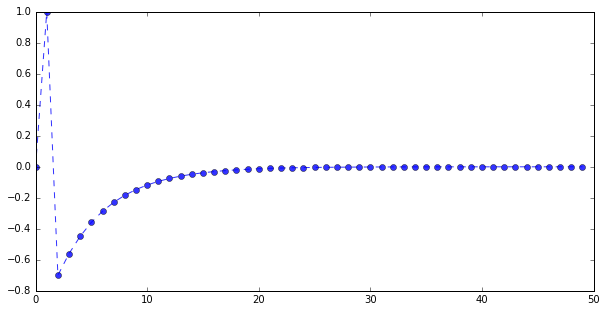

In [6]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Define Parameters for the Model == #
 
# N: number of periods for the transition
# std: st.d of innovation
 
N = 50
std = 1.0
rho = 0.8 
theta = -1.5

A = np.array(([rho,theta],[0,0]))    
C = np.array(([1,1])) 
G = np.array(([1,0])) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std
#Simul_shock = np.random.normal(0, std, N) # Generate random shock for simulation
Simul_x = np.zeros((N+1,2))
Simul_x[0,:]=np.array([0,0])
Simul_y = np.zeros(N)
 
for i in range(0,N):    
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
    Simul_y[i] = np.dot(G, Simul_x[i,:])
     
# == Plot the simulation == #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    


## Lag Operator and Convergence Property

### Lag operator:: $L$

$$Ly_t=y_{t-1}$$

$$L^n y_t=y_{t-n}$$

Linear operator

$$ L(x_t+y_t)=Lx_t+Ly_t$$

$$ L(ay_t)=a Ly_t$$

Important: when $|\rho|<1$,

$$ \frac{1}{1-\rho L}=1+\rho L+\rho^2 L^2+\rho^3 L^3+\ldots$$

Why is this useful?

### AR(1) process

$$y_t=\rho y_{t-1}+w_t=\rho L y_t+w_t$$

$$ y_t=\frac{1}{1-\rho L}w_t$$

The moving average representation can be found by a Taylor expansion coefficients of the operator $\frac{1}{1-\rho L}$

Note that
$$\frac{1}{1-\rho L}=1+\rho L+\rho^2 L^2+\rho^3 L^3+\ldots$$



### AR(2) process

$$y_t=\phi_1 y_t + \phi_2 y_{t-1}+w_t$$

$$ y_t=\phi_1 L y_t + \phi_2 L^2 y_{t}+w_t $$

$$ y_t=\frac{1}{1-\phi_1 L-\phi_2 L^2}w_t=\frac{1}{(1-\rho_1 L)(1-\rho_2 L)}w_t$$

The moving average representation can be found by a Taylor expansion coefficients of the operator $\frac{1}{(1-\rho_1 L)(1-\rho_2 L)}$

Note that
$$\frac{1}{(1-\rho_1 L)(1-\rho_2 L)}=(1+\rho_1 L+\rho^2_1 L^2+\rho^3_1 L^3+\ldots)(1+\rho_2 L+\rho_2^2 L^2+\rho_2^3 L^3+\ldots)$$

To make sure convergence, it has to be both $\rho_1$ and $\rho_2$ are inside the unit circle.

## An  Application: Log-Linearize Solow Growth Model

### Log-linearization

Suppose $x_t$ is close to its steady state value $x$. 

Let $\widehat x$ denote its log deviation from the steady state

$$\widehat x_t=\log x_t -\log x$$

Then

$$ x_t= x \exp (\widehat x_t) $$

Around the steady state, we have

$$ x_t= x \exp (\widehat x_t) \approx x (1+\widehat x_t)$$

### Solow growth model

Now think about the Solow growth model. 

Production function:

$$y_t=\exp(z_t)k_t^\alpha$$

$$y \exp (\widehat y_t)=\exp(z_t)\left[k\exp (\widehat k_t)\right]^\alpha$$

In the steady state, 

$$ y=k^\alpha$$

 
then it follows

$$ \widehat y_t = z_t+\alpha \widehat k_t$$

The law of motion of capital is

$$k_{t+1}=(1-\delta)k_t+s y_t$$

$$k \exp (\widehat k_{t+1})=(1-\delta)k \exp (\widehat k_t)+s y \exp (\widehat y_t)$$

Use the approximation 

$$k [1+\widehat k_{t+1}]=(1-\delta)k [1+\widehat k_{t}]+s y [1+\widehat y_{t}]$$

$$k  \widehat k_{t+1} =(1-\delta)k \widehat k_{t}]+s y \widehat y_{t} $$

$$   \widehat k_{t+1} =(1-\delta)  \widehat k_{t} +s \frac{y}{k} \widehat y_{t} $$

In the steady state

$$k=(1-\delta)k+s y$$

$$\delta k=s y$$

$$s\frac{y}{k}=\delta$$

The law of motion of capital is

\begin{align}
\widehat k_{t+1} &=(1-\delta)  \widehat k_{t} +\delta \widehat y_{t} \\
&= (1-\delta)  \widehat k_{t} +\delta \widehat y_{t} \\
&= (1-\delta)  \widehat k_{t} +\delta (z_t+\alpha \widehat k_t)\\
&= (1-\delta+\alpha \delta)  \widehat k_{t} +\delta  z_t \\
&=(1-\delta+\alpha \delta) L \widehat k_{t+1} +\delta  z_t
\end{align}

If $z_t$ follows an AR(1) process

$$ z_t=\rho z_{t-1}+w_t = \frac{1}{1-\rho L} w_t $$

then

\begin{align}
\widehat k_{t+1} &=  \frac{\delta}{1-(1-\delta+\alpha \delta) L} z_t \\
&=  \frac{\delta}{(1-(1-\delta+\alpha \delta) L)(1-\rho L)} w_t \\
&\\
\widehat y_t  &= z_t+\alpha k_t\\
&=\frac{1}{1-\rho L} w_t + \frac{\alpha \delta}{(1-(1-\delta+\alpha \delta) L)(1-\rho L)} w_t  \\
&=  \frac{1+\alpha\delta-(1-\delta+\alpha \delta) L}{(1-(1-\delta+\alpha \delta) L)(1-\rho L)} w_t 
\end{align}

It turns out that the capital sequences \{$\widehat k_{t+1}$\} follows an AR(2) process

\begin{equation}
\widehat k_{t+1}=\phi_1 \widehat k_{t}+\phi_2 \widehat k_{t-2}+\delta w_t
\end{equation}

where

\begin{align}
\phi_1&=(1-\delta+\alpha \delta)+\rho\\
\phi_2&=-(1-\delta+\alpha \delta)\rho
\end{align}

Also, the output $y_t$ follows an ARMA(2,1) process

\begin{equation}
\widehat y_{t}=\phi_1 \widehat y_{t-1}+\phi_2 \widehat y_{t-1}+(1+\alpha\delta)w_t+\theta w_{t-1}
\end{equation}

where

$$\theta=-(1-\delta+\alpha \delta)$$

### Linear state space

The linear state space representation of capital $\widehat k_{t+1}$ is

$$
    x_{k,t}=
    \begin{bmatrix}
      \widehat  k_{t+1} \\
      \widehat  k_t 
    \end{bmatrix}=A_k x_{k,t-1}+C_k w_t = \begin{bmatrix}
              \phi_1 & \phi_2 \\             
              1 & 0
        \end{bmatrix} \begin{bmatrix}
     \widehat   k_{t} \\
     \widehat   k_{t-1} 
    \end{bmatrix}+ \begin{bmatrix}
        \delta \\
        0
        \end{bmatrix}w_t
$$

with

$$ \widehat k_{t+1}=G_k x_t= \begin{bmatrix}  1 & 0 \end{bmatrix}x_t$$



The linear state space representation of output $\widehat y_{t}$ is

$$
    x_{y,t}=
    \begin{bmatrix}
      \widehat  y_{t} \\
      \widehat  y_{t-1}\\
      w_t
    \end{bmatrix}=A_y x_{y,t-1}+C_y w_t = \begin{bmatrix}
              \phi_1 & \phi_2 &-(1-\delta+\alpha \delta) \\             
              1 & 0 &0\\
              0 & 0 &0
        \end{bmatrix} \begin{bmatrix}
     \widehat   y_{t-1} \\
     \widehat   y_{t-2} \\
     w_{t-1}
    \end{bmatrix}+ \begin{bmatrix}
        1+\alpha\delta \\
        0\\
        1
        \end{bmatrix}w_t
$$

with

$$ \widehat y_{t}=G_y y_t= \begin{bmatrix}  1 & 0  &0\end{bmatrix}x_t$$


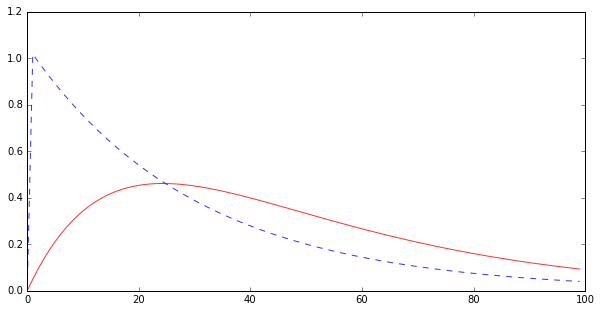

In [10]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# == Define Parameters for the Model == #
 
# N: number of periods for the transition
# std: st.d of innovation
 
N = 100
std = 1.0
rho = 0.95  
alpha = 0.36
delta = 0.05


phi_1 = (1-delta+delta*alpha)+rho
phi_2 = -(1-delta+delta*alpha)*rho
theta = -(1-delta+alpha*delta)

A_k = np.array(([phi_1,phi_2],[1,0]))    
C_k = np.array(([delta,0])) 
G_k = np.array(([1,0])) 

A_y = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
C_y = np.array(([1+alpha*delta,0,1])) 
G_y = np.array(([1,0,0])) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[1]=std
#Simul_shock = np.random.normal(0, std, N) # Generate random shock for simulation

Simul_kx = np.zeros((N+1,2))
Simul_kx[0,:]=np.array([0,0])
 

Simul_yx = np.zeros((N+1,3))
Simul_yx[0,:]=np.array([0,0,0])
 

Simul_y = np.zeros(N)
Simul_k = np.zeros(N)
 
for i in range(1,N):    
    Simul_kx[i,:] = np.dot(A_k, Simul_kx[i-1,:])+np.dot(C_k, Simul_shock[i])
    Simul_k[i] = np.dot(G_k, Simul_kx[i,:])
    
    Simul_yx[i,:] = np.dot(A_y, Simul_yx[i-1,:])+np.dot(C_y, Simul_shock[i])
    Simul_y[i] = np.dot(G_y, Simul_yx[i,:])    
     
# == Plot the simulation == #
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'b--', Simul_k, 'r-', alpha=0.8) 
plt.show()    

# Distributions and Moments

 
## Unconditional Moments


Using state space representation, it's easy to obtain expressions for the
(unconditional) means of $x_t$ and $y_t$

 

Letting $\mu_t \equiv \mathbb E [x_t]$ and using linearity of expectations, we
find that

$$
    \mu_{t+1} = A \mu_t
    \quad \text{with} \quad \mu_0 \text{ given}
$$

Here $\mu_0$ is a primitive given in the state space representation.

The variance-covariance matrix of $x_t$ is 

$$\Sigma_t \equiv \mathbb E [ (x_t - \mu_t) (x_t - \mu_t)']$$

Using 
$$x_{t+1} - \mu_{t+1} = A (x_t - \mu_t) + C w_{t+1}$$,

we can determine this matrix recursively via

$$
\Sigma_{t+1}  = A \Sigma_t A' + C C'
    \quad \text{with} \quad \Sigma_0 \text{ given}
$$

As with $\mu_0$, the matrix $\Sigma_0$ is a primitive given in the state space representation.

As a matter of terminology, we will sometimes call

### $\mu_t$ the unconditional mean  of $x_t$

### $\Sigma_t$ the unconditional variance-convariance matrix   of $x_t$
 

However, you should be aware that these "unconditional" moments do depend on
the initial distribution $N(\mu_0, \Sigma_0)$

Moments of the Observations
 

Using linearity of expectations again we have

$$
    \mathbb E [y_t] = \mathbb E [G x_t] = G \mu_t
$$

The variance-covariance matrix of $y_t$ is easily shown to be

$$
    Var [y_t] = Var [G x_t] = G \Sigma_t G'
$$



## Distributions
 
 

In general, knowing the mean and variance-covariance matrix of a random vector
is not quite as good as knowing the full distribution

However, there are some situations where these moments alone tell us all we
need to know

One such situation is when the vector in question is Gaussian (i.e., normally
distributed)

This is the case here, given

#### Gaussian assumptions on the primitives

#### Normality is preserved under linear operations

 
$$
    u \sim N(\bar u, S)
    \quad \text{and} \quad
    v = a + B u
    \implies
    v \sim N(a + B \bar u, B S B')
$$

In particular, given our Gaussian assumptions on the primitives and the 
linearity of the state space system, we can see immediately that  both $x_t$ and
$y_t$ are  Gaussian for all $t \geq 0$.

Since $x_t$ is Gaussian, to find the distribution, all we need to do is
find its mean and variance-covariance matrix

But in fact we've already done this. 

Letting $\mu_t$ and $\Sigma_t$ be as defined by these equations,
we have

$$
    x_t \sim N(\mu_t, \Sigma_t)
$$

By similar reasoning 

$$
    y_t \sim N(G \mu_t, G \Sigma_t G')
$$

In [8]:
def unconditional_moments(A, C, G, mu_0, Sigma_0,T):
    """
    Constructs series of unconditional moments of $x$ and $y$ for 
    $T$ periods

    Parameters
    ===========

    T : Number of periods to construct moments for

    Returns
    ========

    A tuple containing the moments of the current distribution.  The moments are returned as a 4-tuple with
    the following interpretation:

    mu_x_prime : numpy.ndarray
        An T+1x n array representing the population mean of x_t

    Sigma_x_prime : numpy.ndarray
        An T+1 x n x n array representing the variance-covariance matrix of x_t

    mu_y : numpy.ndarray
        A  T+1 x k array representing the population mean of y_t

    Sigma_y : numpy.ndarray
        A T+1 x k x k array representing the variance-covariance matrix of y_t

    """
    mu_x = mu_0
    Sigma_x = Sigma_0
    for i in range(T):
        mu_y = np.dot(G, mu_x)
        Sigma_y = np.dot(np.dot(G, Sigma_x), G.transpose())
        mu_x = np.dot(A, mu_x)
        Sigma_x = np.dot(np.dot(A, Sigma_x), A.transpose())+np.dot(C, C.transpose())
    return mu_y,Sigma_y,mu_x,Sigma_x

## Ensemble Distribution

### Take our AR(2) process as an example

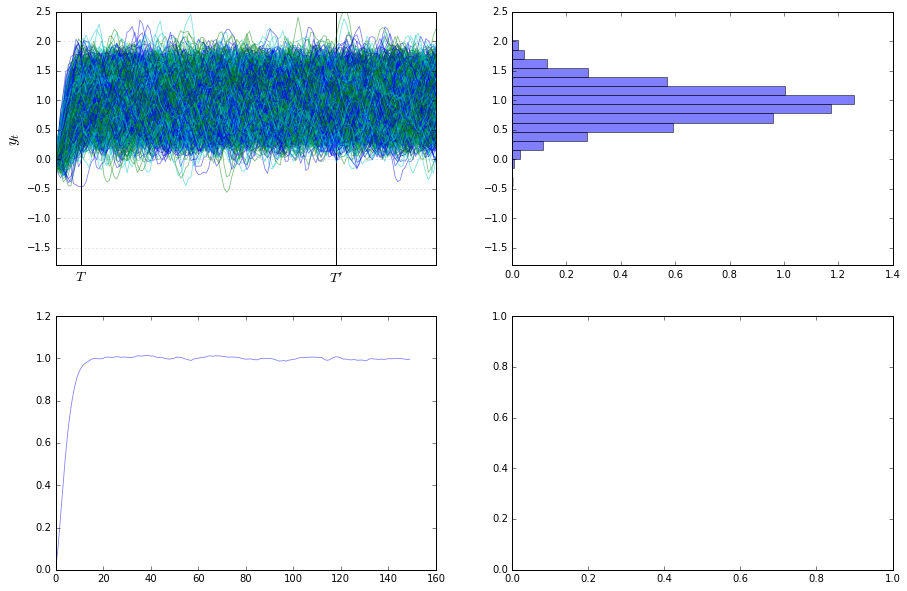

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

# == Setup Parameters for the Model == #

phi_0 = 0.1
phi_1 = 1.4
phi_2 = -0.5
std = 0.1
N = 150 
S = 2000

# == Setup the simulation == #

mu_0 = np.array([1,0,0])
Sigma_0 = np.zeros((3,3))
A = np.array(([1,0,0],[phi_0,phi_1,phi_2],[0,1,0]))     
C = np.array(([0,1,0])) 
C_matrix = np.array(([0,0,0], [0,1,0], [0,0,0])) 
G = np.array(([0,1,0])) 
    
ymin, ymax = -1.8, 2.5

T0 = 10
T1 = 110 

# = Generate Plots = #

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = axes[0,0]
ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$y_t$', fontsize=16)
ax.vlines((T0, T1), ymin, ymax)
ax.set_xticks((T0, T1))
ax.set_xticklabels((r"$T$", r"$T'$"), fontsize=14)

# = Generate Data and plot = #

sample=[]
mean_y=np.zeros(N)
var_y=np.zeros(N)
for j in range(S):
    Simul_shock = np.random.normal(0, std, N)
    Simul_x = np.zeros((N+1,3))
    Simul_x[0,:]=np.array([1,0,0])
    Simul_y = np.zeros(N)
    for i in range(0,N):
        Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i])
        Simul_y[i] = np.dot(G, Simul_x[i,:])
        mean_y[i]=mean_y[i]+Simul_y[i]/S
    sample.append(Simul_y[T0])
    rcolor = random.choice(('c', 'g', 'b'))
    ax.plot(Simul_y, color=rcolor, lw=0.8, alpha=0.5)

axes[0,1].set_ylim(ymin, ymax)
axes[0,1].hist(sample, bins=16, normed=True, orientation='horizontal', alpha=0.5)  
axes[1,0].plot(mean_y, 'b-', lw=0.8, alpha=0.5)
plt.show()

# = Use function to compute the unconditional moments = #

#mu_y,Sigma_y,mu_x,Sigma_x = unconditional_moments(A, C_matrix, G, mu_0, Sigma_0, T0)    


## Moving Average Representations
 

A nonrecursive expression for $x_t$ as a function of $x_0, w_1, w_2, \ldots,  w_t$ can be found by using the state space representation repeatedly  

$$
    \begin{align}
       x_t & = Ax_{t-1} + Cw_t \\
           & = A^2 x_{t-2} + ACw_{t-1} + Cw_t \nonumber \\
           & \qquad \vdots \nonumber \\
           & = \sum_{j=0}^{t-1} A^j Cw_{t-j}  + A^t x_0 \nonumber
    \end{align}
$$


## Stationarity 
 

  
### Stationary Distributions
 

In our setting, a distribution $\psi_{\infty}$ is said to be  stationary  for $x_t$ if

$$
    x_t \sim \psi_{\infty}
    \quad \text{and} \quad
    x_{t+1} = A x_t + C w_{t+1}
    \quad \implies \quad
    x_{t+1} \sim \psi_{\infty}
$$

Since in the present case all distributions are Gaussian, a Gaussian distribution is pinned down by its mean and variance-covariance matrix.

we can restate the definition as follows:$\psi_{\infty}$ is stationary for $x_t$ if

$$
    \psi_{\infty}
    = N(\mu_{\infty}, \Sigma_{\infty})
$$

where $\mu_{\infty}$ and $\Sigma_{\infty}$ are fixed points of 

$$
    \mu_{t+1} = A \mu_t
    \quad \text{with} \quad \mu_0 \text{ given}
$$
$$
\Sigma_{t+1}  = A \Sigma_t A' + C C'
    \quad \text{with} \quad \Sigma_0 \text{ given}
$$

 

A  process $\{x_t\}$ is said to be   stationary if

#### $\mu_t$ and $\Sigma_t$ are constant in $t$

 

In our setting, $\{x_t\}$ will be   stationary if $\mu_0, \Sigma_0, A, C$  assume values that  imply that none of $\mu_t, \Sigma_t$ depends on $t$.

 

Conditions for Stationarity
------------------------------

 
 

The difference equation $\mu_{t+1} = A \mu_t$ is known to have  unique 
fixed point $\mu_{\infty} = 0$ if all eigenvalues of $A$ have moduli strictly less than unity 

The difference equation   also has a unique fixed point in this case, and, moreover

$$
    \mu_t \to \mu_{\infty} = 0
    \quad \text{and} \quad
    \Sigma_t \to \Sigma_{\infty}
    \quad \text{as} \quad t \to \infty
$$

regardless of the initial conditions $\mu_0$ and $\Sigma_0$

Prediction
==================

 
The theory of prediction for linear state space systems is elegant and
simple


 

Forecasting Formulas -- Conditional Means
--------------------------------------------

The natural way to predict variables is to use conditional distributions

For example, the optimal forecast of $x_{t+1}$ given information known at time $t$ is

$$
    \mathbb E_t [x_{t+1}] := \mathbb E [x_{t+1} \mid x_t, x_{t-1}, \ldots, x_0 ] = Ax_t
$$

The right-hand side follows from $x_{t+1} = A x_t + C w_{t+1}$ and the
fact that $w_{t+1}$ is zero mean and independent of $x_t, x_{t-1}, \ldots, x_0$

That $\mathbb E_t [x_{t+1}] = \mathbb E[x_{t+1} \mid x_t]$ is an implication of $\{x_t\}$ having the *Markov property*

The one-step-ahead forecast error is

$$
   x_{t+1} - \mathbb E_t [x_{t+1}] = Cw_{t+1}
$$

The covariance matrix of the forecast error is

$$
   \mathbb E [ (x_{t+1} - \mathbb E_t [ x_{t+1}] ) (x_{t+1} - \mathbb E_t [ x_{t+1}])'] = CC'
$$        

More generally, we'd like to compute the $j$-step ahead forecasts $\mathbb E_t [x_{t+j}]$ and $\mathbb E_t [y_{t+j}]$

With a bit of algebra we obtain

$
    x_{t+j} = A^j x_t + A^{j-1} C w_{t+1} + A^{j-2} C w_{t+2}
    + \cdots + A^0 C w_{t+j}
$
        
In view of the iid property, current and past state values provide no information about future values of the shock

Hence $\mathbb E_t[w_{t+k}] = \mathbb E[w_{t+k}] = 0$

It now follows from linearity of expectations that the $j$-step ahead forecast of $x$ is

$$
    \mathbb E_t [x_{t+j}] = A^j x_t
$$
        
The $j$-step ahead forecast of $y$ is therefore

$$
    \mathbb E_t [y_{t+j}]
    = \mathbb E_t [G x_{t+j} + H v_{t+j}]
    = G A^j x_t
$$

 

Forecasts of Geometric Sums
-------------------------------

In several contexts, we want to compute forecasts of  geometric sums of future random variables governed by the linear state-space system  

We want the following objects

*  Forecast of a geometric sum of future $x$, or $\mathbb E_t \left[ \sum_{j=0}^\infty \beta^j x_{t+j} \right]$

*  Forecast of a geometric sum of future $y$, or $\mathbb E_t \left[\sum_{j=0}^\infty \beta^j y_{t+j} \right]$

These objects are important components of some famous and  interesting dynamic models

For example,

* if $\{y_t\}$ is a stream of dividends, then $\mathbb E \left[\sum_{j=0}^\infty \beta^j y_{t+j} | x_t \right]$ is a model of a stock price

* if $\{y_t\}$ is  the money supply, then $\mathbb E \left[\sum_{j=0}^\infty \beta^j y_{t+j} | x_t \right]$ is a  model of the price level



### Formulas
 

Fortunately, it is easy to use a little matrix algebra to compute these objects

Suppose that every eigenvalue of $A$ has modulus strictly less than $\frac{1}{\beta}$

$$I + \beta A + \beta^2 A^2 + \cdots = \left[I - \beta A \right]^{-1}$$

This leads to our formulas:

* Forecast of a geometric sum of future $x$

$$
    \mathbb E_t \left[\sum_{j=0}^\infty \beta^j x_{t+j} \right]
    = [I + \beta A + \beta^2 A^2 + \cdots \ ] x_t = [I - \beta A]^{-1} x_t
$$
        
* Forecast of a geometric sum of future $y$

$$
    \mathbb E_t \left[\sum_{j=0}^\infty \beta^j y_{t+j} \right]
    = G [I + \beta A + \beta^2 A^2 + \cdots \ ] x_t
    = G[I - \beta A]^{-1} x_t
$$
